In [9]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import random

# load the dataset
X, y = load_digits(return_X_y=True)


Preliminary data analysis:

In [10]:
print(f"Dataset shape: {X.shape}")

n_samples, n_features = X.shape
print(f"Number of samples: {n_samples}")
print(f"Number of features: {n_features}")

print(f"Feature value range: {np.min(X)} to {np.max(X)}")

classes = list(set(y))
print(f"Classes: {classes.sort()}")

print(f"Scale of the dataset: {np.mean(X)}")

print(f"Variance of the dataset: {np.var(X)}")

Dataset shape: (1797, 64)
Number of samples: 1797
Number of features: 64
Feature value range: 0.0 to 16.0
Classes: None
Scale of the dataset: 4.884164579855314
Variance of the dataset: 36.20173240585726


Evaluationg the accuracy of different train-test ratios:

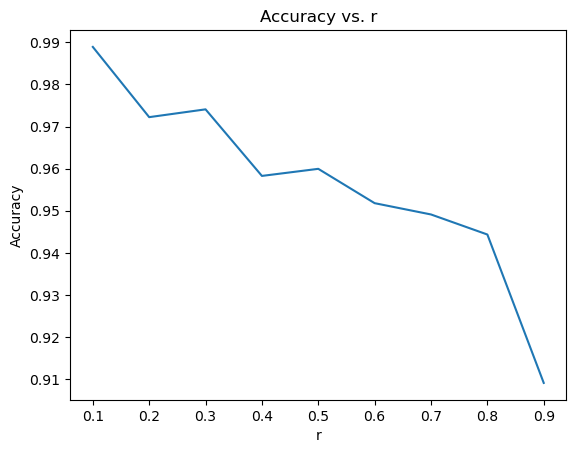

In [11]:
model = LogisticRegression()

ratios = np.arange(start=0.1, stop=1, step=0.1)
accs = []

# Instantiate a StandardScaler object
scaler = StandardScaler()

# Scale the features in your data using the fit_transform() method
X_scaled = scaler.fit_transform(X)

for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=ratio)
    cloned_model = clone(model)
    cloned_model.fit(X_train, y_train)
    acc = accuracy_score(y_test, cloned_model.predict(X_test))
    accs.append(acc)
#     print(acc)

# Plot the accuracy of each r using pyplot
plt.plot(ratios, accs)

# Set the labels for the x and y axes and the title of the plot
plt.xlabel('r')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. r')

# Display the plot
plt.show()


Creating an unbalanced subset of the dataset:

In [12]:
X_indexes = range(X.shape[0])
unbalanced_indexes = random.sample(X_indexes, 1000)

X_unbalanced = X[unbalanced_indexes]
y_unbalanced = y[unbalanced_indexes]

print(X_unbalanced.shape)
print(y_unbalanced.shape)

y_frequencies = [0 for i in range()]


(1000, 64)
(1000,)


TypeError: range expected at least 1 argument, got 0